### 2015 & 2017 U.S. Census Demographic data

I have choosen a data from a Kaggle dataset pulled from U.S. Census Demographic Data for each county or county equivalent in the US, including DC and Puerto Rico. I chose this dataset as it provided plenty of data to play with and allow me to practice my new skills. We hear about different about various aspect of the United States, but how many are based completely on data and how many are heresay. I chose the 2015 and 2017 dataset to compare and see what changes have occurred within a two year period.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
# 2015 Census Data
df15 = pd.read_csv('acs2015_county_data.csv', index_col=None)
# 2017 Census Data
df17 = pd.read_csv('acs2017_county_data.csv', index_col=None)

In [3]:
df15.head(5)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
df17.head(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [5]:
# Removing counties and consolidating the data by grouping per state to the 2015 dataset.
state15 = df15.groupby(by='State').mean().round(2)
#.round(2)
# Resetting index to prevent 'State from being a row index'
state15 = state15.reset_index(drop=False)

#Removing columns that have percentages as I have plenty with whole numbers to explore.
state15 = state15.drop(columns=['Hispanic','White','Black','Native','Asian','Pacific','Poverty',
                       'ChildPoverty','Professional','Service','Office','Construction',
                       'Production','Drive','Carpool', 'Transit','Walk', 'OtherTransp',
                       'WorkAtHome','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment'])

# Removing Puerto Rico from 2015 dataset
state15 = state15[state15.State != 'Puerto Rico']

state15.head()

,State,CensusId,TotalPop,Men,Women,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed
0,Alabama,1067.00,72098.81,34941.69,37157.12,54044.69,37973.13,2250.34,20780.94,1029.79,25.93,30183.96
1,Alaska,2149.66,25288.79,13246.90,12041.90,18067.10,64197.10,5383.31,30332.97,2260.59,11.23,12107.17
2,Arizona,4013.87,442795.20,219939.20,222856.00,301772.93,43252.20,1892.67,21052.53,728.53,21.72,187560.40
3,Arkansas,5075.00,39442.77,19358.84,20083.93,28854.44,36626.48,2590.27,20072.03,1247.32,23.17,16747.75
4,California,6058.00,662439.03,329088.53,333350.50,418626.71,56013.16,2242.12,27902.60,947.17,24.97,297351.03


In [6]:
#df15[['State', 'TotalPop']].groupby(by='State')[['TotalPop']].sum()

In [7]:
# Removing counties and consolidating the data by grouping per state to the 2015 dataset.
state15 = df15.groupby(by='State').mean().round(2)
#.round(2)
# Resetting index to prevent 'State from being a row index'
state15 = state15.reset_index(drop=False)

#Removing columns that have percentages as I have plenty with whole numbers to explore.
state15 = state15.drop(columns=['Hispanic','White','Black','Native','Asian','Pacific','Poverty',
                       'ChildPoverty','Professional','Service','Office','Construction',
                       'Production','Drive','Carpool', 'Transit','Walk', 'OtherTransp',
                       'WorkAtHome','PrivateWork','PublicWork','SelfEmployed','FamilyWork'])

# Removing Puerto Rico from 2015 dataset
state15 = state15[state15.State != 'Puerto Rico']

state15.head()

,State,CensusId,TotalPop,Men,Women,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed,Unemployment
0,Alabama,1067.00,72098.81,34941.69,37157.12,54044.69,37973.13,2250.34,20780.94,1029.79,25.93,30183.96,11.31
1,Alaska,2149.66,25288.79,13246.90,12041.90,18067.10,64197.10,5383.31,30332.97,2260.59,11.23,12107.17,9.86
2,Arizona,4013.87,442795.20,219939.20,222856.00,301772.93,43252.20,1892.67,21052.53,728.53,21.72,187560.40,11.97
3,Arkansas,5075.00,39442.77,19358.84,20083.93,28854.44,36626.48,2590.27,20072.03,1247.32,23.17,16747.75,8.98
4,California,6058.00,662439.03,329088.53,333350.50,418626.71,56013.16,2242.12,27902.60,947.17,24.97,297351.03,10.80


In [8]:
# Removing counties and consolidating the data by grouping per state to the 2017 dataset.
state17 = df17.groupby(by='State').mean().round(2)
# Resetting index to prevent 'State from being a row index'
state17 = state17.reset_index(drop=False)

#Removing columns that have percentages as I have plenty with whole numbers to explore.
state17 = state17.drop(columns=['Hispanic','White','Black','Native','Asian','Pacific','Poverty',
                       'ChildPoverty','Professional','Service','Office','Construction',
                       'Production','Drive','Carpool', 'Transit','Walk', 'OtherTransp',
                       'WorkAtHome','PrivateWork','PublicWork','SelfEmployed','FamilyWork'])

#Removing Puerto Rico from 2017 dataset
state17 = state17[state17.State != 'Puerto Rico']

state17.head()

,State,CountyId,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed,Unemployment
0,Alabama,1067.00,72399.57,35086.66,37312.91,54506.18,40271.40,2513.19,22180.49,1195.34,26.19,30679.24,9.02
1,Alaska,2149.66,25467.76,13321.34,12146.41,18294.93,66425.45,5500.83,31670.55,2340.86,11.20,12208.45,9.66
2,Arizona,4013.87,453996.40,225670.33,228326.07,312678.47,45816.67,2159.93,22712.20,805.20,21.70,196926.07,9.77
3,Arkansas,5075.00,39705.92,19488.68,20217.24,29118.60,39025.08,2859.33,21449.31,1437.59,23.01,17020.48,7.29
4,California,6058.00,672118.05,333906.53,338211.52,430519.12,61046.76,2232.40,30416.48,1022.12,25.53,310239.91,8.27


Since U.S. regions are referred to in many places from new articles, books, maps, etc, I decided that would be helpful in seeing the big picture easier.

I have created State/Region data dict per [Wikipedia](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States), so I am able to run some queries on the different US regions. 

In [9]:
region = {"Connecticut": 'Northeast',"Maine": 'Northeast',"Massachusetts": 'Northeast',
           "New Hampshire": 'Northeast', "Rhode Island": 'Northeast',"Vermont": 'Northeast',
           "New Jersey": 'Northeast',"New York": 'Northeast', "Pennsylvania": 'Northeast',
           "Indiana": 'Midwest',"Illinois": 'Midwest',"Michigan": 'Midwest',"Ohio": 'Midwest',
           "Wisconsin": 'Midwest',"Iowa": 'Midwest',"Kansas": 'Midwest',"Minnesota": 'Midwest',
           "Missouri": 'Midwest',"Nebraska": 'Midwest',"North Dakota": 'Midwest',
           "South Dakota": 'Midwest',"Delaware": 'South',"District of Columbia": 'South',
           "Florida": 'South',"Georgia": 'South',"Maryland": 'South',"North Carolina": 'South',
           "South Carolina": 'South',"Virginia": 'South',"West Virginia": 'South',"Alabama": 'South',
           "Kentucky": 'South',"Mississippi": 'South',"Tennessee": 'South',"Arkansas": 'South',
           "Louisiana": 'South',"Oklahoma": 'South',"Texas": 'South',"Arizona": 'West',
           "Colorado": 'West',"Idaho": 'West',"New Mexico": 'West',"Montana": 'West',
           "Utah": 'West',"Nevada": 'West',"Wyoming": 'West',"Alaska": 'West',"California": 'West',
            "Hawaii": 'West',"Oregon": 'West',"Washington": 'West'}

In [10]:
# Adding Region column to 2015 dataset.
state15["Region"] = state15["State"].replace(region)

state15.head()

,State,CensusId,TotalPop,Men,Women,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed,Unemployment,Region
0,Alabama,1067.00,72098.81,34941.69,37157.12,54044.69,37973.13,2250.34,20780.94,1029.79,25.93,30183.96,11.31,South
1,Alaska,2149.66,25288.79,13246.90,12041.90,18067.10,64197.10,5383.31,30332.97,2260.59,11.23,12107.17,9.86,West
2,Arizona,4013.87,442795.20,219939.20,222856.00,301772.93,43252.20,1892.67,21052.53,728.53,21.72,187560.40,11.97,West
3,Arkansas,5075.00,39442.77,19358.84,20083.93,28854.44,36626.48,2590.27,20072.03,1247.32,23.17,16747.75,8.98,South
4,California,6058.00,662439.03,329088.53,333350.50,418626.71,56013.16,2242.12,27902.60,947.17,24.97,297351.03,10.80,West


In [11]:
df_region15 = state15[['Region','State','TotalPop']].groupby(by='Region')[['TotalPop']].sum()
df_region15 = df_region15.reset_index(drop=False)
df_region15.sort_values(['TotalPop'], ascending=False).head()

,Region,TotalPop
2,South,2337411.23
1,Northeast,2331170.28
3,West,2190763.31
0,Midwest,748343.05


In [12]:
df_state15 = state15[['Region','State','TotalPop']].groupby(by='State')[['TotalPop']].sum()
df_state15 = df_state15.reset_index(drop=False)
df_state15.sort_values(['TotalPop'], ascending=False).head(10)

,State,TotalPop
4,California,662439.03
8,District of Columbia,647484.00
21,Massachusetts,478970.43
6,Connecticut,449152.75
2,Arizona,442795.20
30,New Jersey,424019.67
32,New York,317309.26
7,Delaware,308818.00
9,Florida,293220.48
11,Hawaii,281259.80


In [13]:
df_income15 = state15[['Region','State','Income']].groupby(by='State')[['Income']].sum()
df_income15 = df_income15.reset_index(drop=False)
df_income15.sort_values(['Income'], ascending=False).head(10)

,State,Income
30,New Jersey,73014.10
6,Connecticut,71184.12
8,District of Columbia,70848.00
20,Maryland,69200.38
21,Massachusetts,65974.43
39,Rhode Island,65783.40
11,Hawaii,64879.00
1,Alaska,64197.10
29,New Hampshire,60648.90
7,Delaware,58067.67


In [14]:
# Adding Region column to 2017 dataset.
state17["Region"] = state17["State"].replace(region)
state17.head()

,State,CountyId,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed,Unemployment,Region
0,Alabama,1067.00,72399.57,35086.66,37312.91,54506.18,40271.40,2513.19,22180.49,1195.34,26.19,30679.24,9.02,South
1,Alaska,2149.66,25467.76,13321.34,12146.41,18294.93,66425.45,5500.83,31670.55,2340.86,11.20,12208.45,9.66,West
2,Arizona,4013.87,453996.40,225670.33,228326.07,312678.47,45816.67,2159.93,22712.20,805.20,21.70,196926.07,9.77,West
3,Arkansas,5075.00,39705.92,19488.68,20217.24,29118.60,39025.08,2859.33,21449.31,1437.59,23.01,17020.48,7.29,South
4,California,6058.00,672118.05,333906.53,338211.52,430519.12,61046.76,2232.40,30416.48,1022.12,25.53,310239.91,8.27,West


In [15]:
df_region17 = state17[['Region','State','TotalPop']].groupby(by='Region')[['TotalPop']].sum()
df_region17 = df_region17.reset_index(drop=False)
df_region17.sort_values(['TotalPop'], ascending=False).head()

,Region,TotalPop
2,South,2393090.67
1,Northeast,2343328.90
3,West,2234210.46
0,Midwest,751962.98


In [16]:
df_state17 = state17[['Region','State','TotalPop']].groupby(by='State')[['TotalPop']].sum()
df_state17 = df_state17.reset_index(drop=False)
df_state17.sort_values(['TotalPop'], ascending=False).head(10)

,State,TotalPop
8,District of Columbia,672391.00
4,California,672118.05
21,Massachusetts,484951.36
2,Arizona,453996.40
6,Connecticut,449309.75
30,New Jersey,426674.33
32,New York,319326.26
7,Delaware,314577.33
9,Florida,302663.39
11,Hawaii,284331.60


In [17]:
df_income17 = state17[['Region','State','Income']].groupby(by='State')[['Income']].sum()
df_income17 = df_income17.reset_index(drop=False)

df_income17.sort_values(['Income'], ascending=False).head(10)

,State,Income
8,District of Columbia,77649.00
30,New Jersey,77047.76
6,Connecticut,74496.00
20,Maryland,72541.17
21,Massachusetts,71030.71
39,Rhode Island,69906.40
11,Hawaii,68663.00
1,Alaska,66425.45
29,New Hampshire,64901.90
7,Delaware,61294.67


### 1st Question: Which regions in the United State have the largest populations?

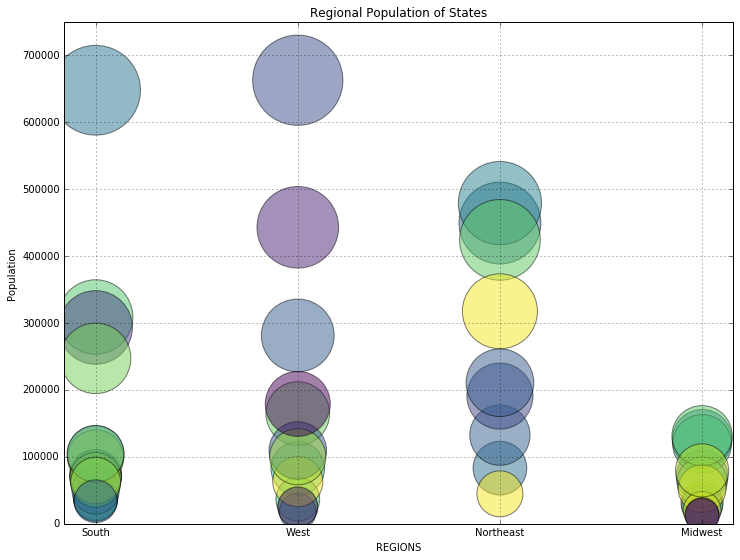

In [18]:
# Creating bubble chart for population per Region for 2015 dataset
x = state15['Region']
y = state15['TotalPop']
colors = np.random.rand(51)
#area = np.sqrt['TotalPop']


plt.figure(figsize=(12,9))
plt.scatter(x, y, s=np.sqrt(y*100), c=colors, cmap='viridis', alpha=0.5)

# Add titles (main and on axis)
plt.ylim(0, 750000)
plt.grid(True)
plt.xlabel('REGIONS')
plt.ylabel('Population')
plt.title("Regional Population of States")

plt.show()

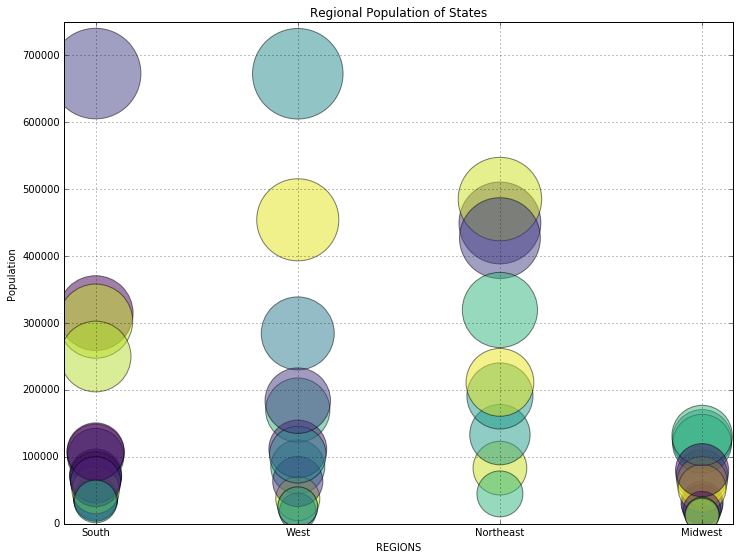

In [19]:
# Creating bubble chart for population per Region for 2017 dataset
x = state17['Region']
y = state17['TotalPop']
colors = np.random.rand(51)
#area = np.sqrt['TotalPop']


plt.figure(figsize=(12,9))
plt.scatter(x, y, s=np.sqrt(y*100), c=colors, cmap='viridis', alpha=0.5)

# Add titles (main and on axis)
plt.ylim(0, 750000)
plt.grid(True)
plt.xlabel('REGIONS')
plt.ylabel('Population')
plt.title("Regional Population of States")

plt.show()

In [20]:
df15[['TotalPop']].sum()

TotalPop    320098094
dtype: int64

In [21]:
df17[['TotalPop']].sum()

TotalPop    324473370
dtype: int64

### 2nd Question:  Did the Population in the U.S. increase between 2015 and 2017?

<function matplotlib.pyplot.show(*args, **kw)>

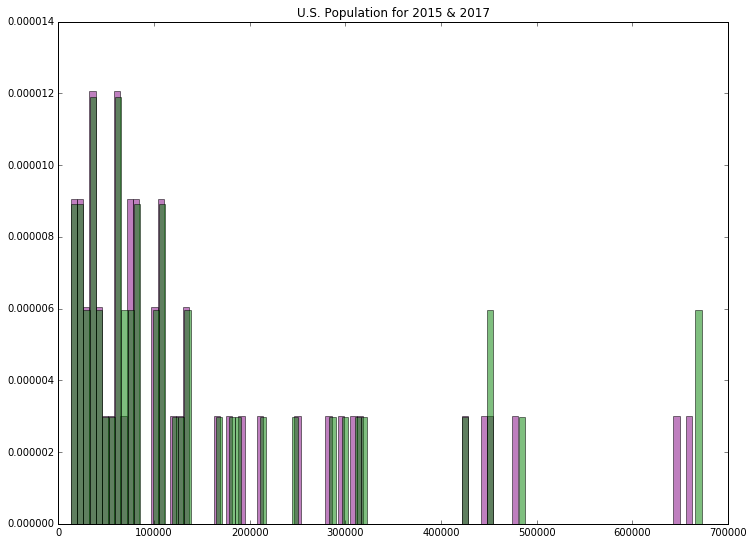

In [22]:
#Hist of Pop
x = state15['TotalPop']
y = state17['TotalPop']

plt.figure(figsize=(12,9))
plt.hist(x, bins=100, color='purple', density=True, alpha=.5)
plt.hist(y,bins=100, color='green', density=True, alpha=.5)
plt.title('U.S. Population for 2015 & 2017')
xlabel=('Population')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

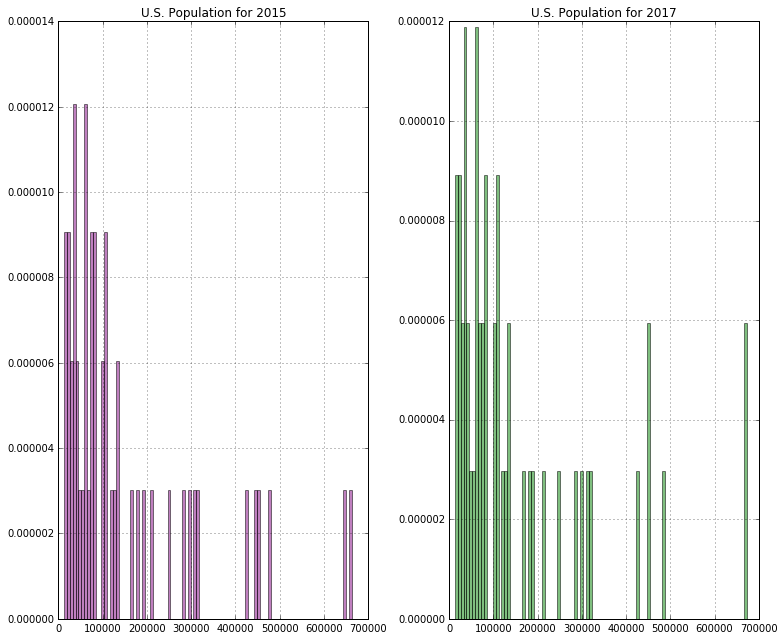

In [23]:
x = state15['TotalPop']
y = state17['TotalPop']

plt.figure(figsize=(11,9))

plt.subplot(121)
#plt.ylim(0, 750000)
plt.grid(True)
plt.hist(x, bins=100, color='purple', density=True, alpha=.5)
plt.title('U.S. Population for 2015')
xlabel=('Population')

plt.subplot(122)
#plt.ylim(0, 750000)
plt.grid(True)
plt.hist(y,bins=100, color='green', density=True, alpha=.5)
plt.title('U.S. Population for 2017')
xlabel=('Population')
plt.tight_layout()

plt.show

### 3rd Question: Is there a difference of income in the states with the largest populations?

In [24]:
# Top ten states income levels for 2015
df_income15[['State','Income']].groupby(by='State')[['Income']].sum()

topten_income15= df_income15.nlargest(10,'Income','first')
topten_income15 = topten_income15.reset_index(drop=False)

topten_income15.head(10)

,index,State,Income
0,30,New Jersey,73014.10
1,6,Connecticut,71184.12
2,8,District of Columbia,70848.00
3,20,Maryland,69200.38
4,21,Massachusetts,65974.43
5,39,Rhode Island,65783.40
6,11,Hawaii,64879.00
7,1,Alaska,64197.10
8,29,New Hampshire,60648.90
9,7,Delaware,58067.67


In [ ]:
# Creating bar chart for income for top ten states for 2015 dataset
x = topten_income15['State']
y = topten_income15['Income']

plt.barh(x, y, color='Green')

# Add titles (main and on axis)
plt.grid(True)
plt.xlabel('Income')
plt.ylabel('States')
plt.title("Top Ten States with the Highest Income")

plt.show()

In [27]:
# Top ten states income levels for 2015
df_income17[['State','Income']].groupby(by='State')[['Income']].sum()

topten_income17= df_income17.nlargest(10,'Income','first')
topten_income17 = topten_income17.reset_index(drop=False)

topten_income17.head(10)

,index,State,Income
0,8,District of Columbia,77649.00
1,30,New Jersey,77047.76
2,6,Connecticut,74496.00
3,20,Maryland,72541.17
4,21,Massachusetts,71030.71
5,39,Rhode Island,69906.40
6,11,Hawaii,68663.00
7,1,Alaska,66425.45
8,29,New Hampshire,64901.90
9,7,Delaware,61294.67


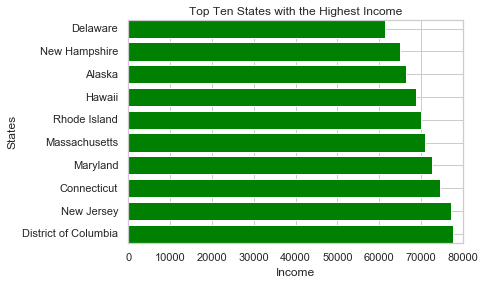

In [28]:
# Creating bar chart for income for top ten states for 2017 dataset
x = topten_income17['State']
y = topten_income17['Income']

plt.barh(x, y, color='Green')

# Add titles (main and on axis)
plt.grid(True)
plt.xlabel('Income')
plt.ylabel('States')
plt.title("Top Ten States with the Highest Income")

plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


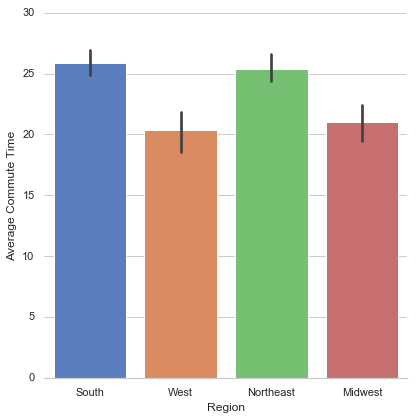

In [25]:
sns.set(style='whitegrid')

g = sns.catplot(x='Region', y='MeanCommute', data=state15,
               height=6, kind='bar', palette='muted')

g.despine(left=True)
g.set_ylabels('Average Commute Time')

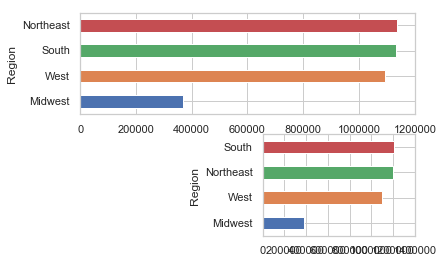

In [26]:
fig = plt.figure()
# Divide the figure into a 1x2 grid for the first section
ax1 = fig.add_subplot(2, 2, (1,2))

# Divide the figure into a 1x2 grid for the second section
ax2 = fig.add_subplot(224)

state15.groupby('Region')['Men'].sum().sort_values().plot(kind='barh', ax=ax1)
state15.groupby('Region')['Women'].sum().sort_values().plot(kind='barh', ax=ax2)